In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
import bz2

%matplotlib inline

pd.options.display.max_columns = None

In [ ]:
f_in = open("../challenge/bookings.csv.bz2", "rb")
f_out = open("../challenge/bookings.csv", "wb")

f_out.write(bz2.decompress(f_in.read()))

f_out.close()
f_in.close()

In [12]:
f_in = open("../challenge/searches.csv.bz2", "rb")
f_out = open("../challenge/searches.csv", "wb")

f_out.write(bz2.decompress(f_in.read()))

f_out.close()
f_in.close()

# Exercise 1

Count the number of lines in Python for
each file

In [3]:
bz_bookings = bz2.BZ2File("../challenge/bookings.csv.bz2")
line_list_bookings = bz_bookings.readlines()

In [4]:
len(line_list_bookings)

10000011

In [3]:
bz_searches = bz2.BZ2File("../challenge/searches.csv.bz2")

In [4]:
line_list_searches = bz_searches.readlines()

In [5]:
len(line_list_searches)

20390199

# Exercise 2

Top 10 arrival airports in the world in 2013 (using the bookings file)
- To get the total number of passengers for an airport, you can sum the column `pax`, grouping by `arr_port`. Note that there is negative pax. That corresponds to cancelations. So to get the total number of passengers that have actually booked, you should sum including the negatives (that will remove the canceled bookings).
- Print the top 10 arrival airports in the standard output, including the number of passengers.
- Bonus point: Get the name of the city or airport corresponding to that airport (programatically, we suggest to have a look at GeoBases in Github)
- Bonus point: Solve this problem using pandas (instead of any other approach)

### First approximation

We load ten rows to see all the columns.

In [25]:
bookings = pd.read_csv('../challenge/bookings.csv', nrows=10, sep='^', )
bookings.head()

,act_date,source,pos_ctry,pos_iata,pos_oid,rloc,cre_date,duration,distance,dep_port,dep_city,dep_ctry,arr_port,arr_city,arr_ctry,lst_port,lst_city,lst_ctry,brd_port,brd_city,brd_ctry,off_port,off_city,off_ctry,mkt_port,mkt_city,mkt_ctry,intl,route,carrier,bkg_class,cab_class,brd_time,off_time,pax,year,month,oid
0,2013-03-05 00:00:00,1A,DE,a68dd7ae953c8acfb187a1af2dcbe123,1a11ae49fcbf545fd2afc1a24d88d2b7,ea65900e72d71f4626378e2ebd298267,2013-02-22 00:00:00,1708,0,ZRH,ZRH,CH,LHR,LON,GB,ZRH,ZRH,CH,LHR,LON,GB,ZRH,ZRH,CH,LHRZRH,LONZRH,CHGB,1,LHRZRH,VI,T,Y,2013-03-07 08:50:00,2013-03-07 11:33:37,-1,2013,3,NULL
1,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,SAL,SV,CLT,CLT,US,SAL,SAL,SV,SAL,SAL,SV,CLT,CLT,US,CLTSAL,CLTSAL,SVUS,1,SALATLCLT,NV,L,Y,2013-04-12 13:04:00,2013-04-12 22:05:40,1,2013,3,NULL
2,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,SAL,SV,CLT,CLT,US,SAL,SAL,SV,CLT,CLT,US,SAL,SAL,SV,CLTSAL,CLTSAL,SVUS,1,CLTATLSAL,NV,U,Y,2013-07-15 07:00:00,2013-07-15 11:34:51,1,2013,3,NULL
3,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,AKL,NZ,SVO,MOW,RU,AKL,AKL,NZ,AKL,AKL,NZ,SVO,MOW,RU,AKLSVO,AKLMOW,NZRU,1,AKLHKGSVO,XK,G,Y,2013-04-24 23:59:00,2013-04-25 16:06:31,1,2013,3,SYDA82546
4,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,AKL,NZ,SVO,MOW,RU,AKL,AKL,NZ,SVO,MOW,RU,AKL,AKL,NZ,AKLSVO,AKLMOW,NZRU,1,SVOHKGAKL,XK,G,Y,2013-05-14 20:15:00,2013-05-16 10:44:50,1,2013,3,SYDA82546


Once we know our columns we can load more rows and drop the columns we don't need.

In [8]:
bookings = pd.read_csv('../challenge/bookings.csv', nrows=100000, sep='^', 
                       usecols=['arr_port', 'pax', 'year'])
bookings.head()

,arr_port,pax,year
0,LHR,-1,2013
1,CLT,1,2013
2,CLT,1,2013
3,SVO,1,2013
4,SVO,1,2013


In [17]:
bookings_2013 = bookings[bookings['year'] == 2013]

top_10_2013 = bookings_2013.groupby('arr_port').sum().sort_values(by='pax', ascending=False).head(10)
top_10_2013.drop('year', axis=1)

,pax
arr_port,
LHR,1006
MCO,861
JFK,795
LAX,761
BKK,747
LAS,732
SFO,705
ORD,686
CDG,676


### Chunks

Let's define a function to process the data.

In [28]:
def data_preprocessing(df, year):
    '''
    Takes a dataframe and a year, filters it by year, drops the year,
    and drops null values.
    Returns a dataframe.
    
    PARAMETERS
    df: Dataframe
    year: Year to filter by
    '''
    df[df['year'] == year]
    df.drop('year', axis=1, inplace=True)
    df.dropna(inplace=True)
    return df

In [29]:
data_iterator = pd.read_csv("../challenge/bookings.csv", chunksize=10**6, 
                            sep='^', usecols=['arr_port', 'pax', 'year'])

chunk_list = []  
# Each chunk is in dataframe format
for data_chunk in data_iterator: 
    data_chunk = data_preprocessing(data_chunk, 2013)
    chunk_list.append(data_chunk)

bookings = pd.concat(chunk_list)

In [13]:
bookings.shape

(10000009, 2)

*Continue a few cells down.*

------------------------------------------------------

In [15]:
bookings.shape

(10000010, 3)

In [21]:
bookings.head(3)

,arr_port,pax,year
0,LHR,-1.0,2013.0
1,CLT,1.0,2013.0
2,CLT,1.0,2013.0


In [16]:
bookings.isna().sum() 

arr_port    0
pax         1
year        1
dtype: int64

In [19]:
bookings.dropna(inplace=True)

In [20]:
bookings.shape

(10000009, 3)

This data treatment is more efficient if we do it in the for loop.

--------------------------------------------------

*Continue here.*

Now that we have a clean dataframe we can perform the same process as in "First approximation". 

Let's aggregate the data by `arr_port` using the `df.pivot_table()` method!!

In [55]:
def data_preprocessing(df, year):
    '''
    Takes a dataframe and a year, filters it by year, drops the year,
    and drops null values.
    Returns a dataframe.
    
    PARAMETERS
    df: Dataframe
    year: Year to filter by
    '''
    df[df['year'] == year]
    #df.drop('year', axis=1, inplace=True)
    df.dropna(inplace=True)
    return df

In [70]:
data_iterator = pd.read_csv("../challenge/bookings.csv.bz2", chunksize=10**6, 
                            sep='^', usecols=['arr_port', 'pax', 'year'],
                            compression='bz2'
                           )

sum_chunks = pd.DataFrame()
# Each chunk is in dataframe format
for i, data_chunk in enumerate(data_iterator):
    print("Chunk: %d, size of chunk %d"%(i+1, len(data_chunk)))
    data_chunk = data_preprocessing(data_chunk, 2013)
    
    data_chunk['arr_port'] = data_chunk['arr_port'].str.strip()
    data_chunk.drop('year', axis=1, inplace=True)

    #data_chunk = data_chunk.pivot_table(values='pax', index='arr_port', 
     #                                   aggfunc=np.sum)
    chunk_result = data_chunk.groupby('arr_port').sum()
    
    
    sum_chunks = sum_chunks.append(chunk_result)

Chunk: 1, size of chunk 1000000
Chunk: 2, size of chunk 1000000
Chunk: 3, size of chunk 1000000
Chunk: 4, size of chunk 1000000
Chunk: 5, size of chunk 1000000
Chunk: 6, size of chunk 1000000
Chunk: 7, size of chunk 1000000
Chunk: 8, size of chunk 1000000
Chunk: 9, size of chunk 1000000
Chunk: 10, size of chunk 1000000
Chunk: 11, size of chunk 10


In [77]:
sum_chunks.groupby(by='arr_port').sum().sort_values('pax', ascending=False).head(10)

,pax
arr_port,
LHR,88809.0
MCO,70930.0
LAX,70530.0
LAS,69630.0
JFK,66270.0
CDG,64490.0
BKK,59460.0
MIA,58150.0
SFO,58000.0


In [33]:
bookings['arr_port'] = bookings['arr_port'].str.strip()
bookings['arr_port'].apply(len).value_counts()

3    10000009
Name: arr_port, dtype: int64

In [34]:
top_10 = bookings.pivot_table(values='pax', index='arr_port', 
                              aggfunc=np.sum).sort_values(by='pax', ascending=False).head(10)
top_10

,pax
arr_port,
LHR,88809.0
MCO,70930.0
LAX,70530.0
LAS,69630.0
JFK,66270.0
CDG,64490.0
BKK,59460.0
MIA,58150.0
SFO,58000.0


In [37]:
top_10.to_csv('exercise_2.csv', sep = '^', index = False)

Top 10 airports by total number of passengers 

In [27]:
from neobase import NeoBase

ModuleNotFoundError: No module named 'neobase'

# Exercise 3

**Plot the monthly number of searches for flights arriving at Málaga, Madrid or Barcelona**

- For the arriving airport, you can use the Destination column in the searches file. 
- Plot a curve for Málaga, another one for Madrid, and another one for Barcelona, in the same figure.
- **Bonus point**: Solving this problem using pandas (instead of any other approach)

In [3]:
searches = pd.read_csv('../challenge/searches.csv.bz2', nrows=10, sep='^', 
                       compression='bz2', parse_dates=['Date'])
searches.head()

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,Seg1Arrival,Seg1Date,Seg1Carrier,Seg1BookingCode,Seg2Departure,Seg2Arrival,Seg2Date,Seg2Carrier,Seg2BookingCode,Seg3Departure,Seg3Arrival,Seg3Date,Seg3Carrier,Seg3BookingCode,Seg4Departure,Seg4Arrival,Seg4Date,Seg4Carrier,Seg4BookingCode,Seg5Departure,Seg5Arrival,Seg5Date,Seg5Carrier,Seg5BookingCode,Seg6Departure,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
0,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1,2,TXL,AUH,2013-01-26,D2,NaN,AUH,TXL,2013-02-02,D2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA
1,2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0,1,ATH,MIL,2013-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV
2,2013-01-01,18:04:49,MPT,3561a60621de06ab1badc8ca55699ef3,US,ICT,SFO,1,2,ICT,SFO,2013-08-02,NaN,NaN,SFO,ICT,2013-08-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC
3,2013-01-01,17:42:40,FXP,1864e5e8013d9414150e91d26b6a558b,SE,RNB,ARN,0,1,RNB,ARN,2013-01-02,DU,W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO
4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1,2,OSL,MAD,2013-03-22,NaN,NaN,MAD,OSL,2013-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL


In [4]:
searches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               10 non-null     datetime64[ns]
 1   Time               10 non-null     object        
 2   TxnCode            10 non-null     object        
 3   OfficeID           10 non-null     object        
 4   Country            10 non-null     object        
 5   Origin             10 non-null     object        
 6   Destination        10 non-null     object        
 7   RoundTrip          10 non-null     int64         
 8   NbSegments         10 non-null     int64         
 9   Seg1Departure      10 non-null     object        
 10  Seg1Arrival        10 non-null     object        
 11  Seg1Date           10 non-null     object        
 12  Seg1Carrier        2 non-null      object        
 13  Seg1BookingCode    1 non-null      object        
 14  Seg2Departure

In [ ]:
data_iterator = pd.read_csv("../challenge/bookings.csv.bz2", chunksize=10**6, 
                            sep='^', usecols=['arr_port', 'pax', 'year'],
                            compression='bz2'
                           )

sum_chunks = pd.DataFrame()
# Each chunk is in dataframe format
for i, data_chunk in enumerate(data_iterator):
    print("Chunk: %d, size of chunk %d"%(i+1, len(data_chunk)))
    #data_chunk = data_preprocessing(data_chunk, 2013)
    
    #data_chunk['arr_port'] = data_chunk['arr_port'].str.strip()
    #data_chunk.drop('year', axis=1, inplace=True)

    #data_chunk = data_chunk.pivot_table(values='pax', index='arr_port', 
     #                                   aggfunc=np.sum)
    chunk_result = data_chunk.groupby('arr_port').sum()
    
    
    sum_chunks = sum_chunks.append(chunk_result)

In [5]:
chunks = pd.read_csv('../challenge/searches.csv.bz2', chunksize=10**6,  
                     sep='^', compression='bz2', 
                     usecols=['Date', 'Destination'])

searches = pd.concat(chunks)

In [6]:
searches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20390198 entries, 0 to 20390197
Data columns (total 2 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   Date         object
 1   Destination  object
dtypes: object(2)
memory usage: 311.1+ MB


In [7]:
searches.head()

,Date,Destination
0,2013-01-01,AUH
1,2013-01-01,MIL
2,2013-01-01,SFO
3,2013-01-01,ARN
4,2013-01-01,MAD


In [38]:
searches['Date'] = pd.to_datetime(searches['Date'], errors='coerce')

In [9]:
searches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20390198 entries, 0 to 20390197
Data columns (total 2 columns):
 #   Column       Dtype         
---  ------       -----         
 0   Date         datetime64[ns]
 1   Destination  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 311.1+ MB


In [10]:
searches['Date'].isna().sum()

33

In [11]:
searches['Destination'].isna().sum()

33

In [12]:
searches.dropna(inplace=True)

In [13]:
searches['Date'].isna().sum()

0

In [21]:
searches['Destination'] = searches['Destination'].str.strip()

In [40]:
searches['Date'].dt.year.value_counts()

2013    20390165
Name: Date, dtype: int64

|City|IATA Code|
|:----:|:----:|
|Madrid|MAD|
|Málaga|AGP|
|Barcelona|BCN|

In [23]:
madrid_searches = searches[searches['Destination'] == 'MAD']
madrid_searches.head()

,Date,Destination
4,2013-01-01,MAD
151,2013-01-01,MAD
375,2013-01-01,MAD
406,2013-01-01,MAD
509,2013-01-01,MAD


In [24]:
malaga_searches = searches[searches['Destination'] == 'AGP']
malaga_searches.head()

,Date,Destination
93,2013-01-01,AGP
147,2013-01-01,AGP
242,2013-01-01,AGP
458,2013-01-01,AGP
674,2013-01-01,AGP


In [25]:
barcelona_searches = searches[searches['Destination'] == 'BCN']
barcelona_searches.head()

,Date,Destination
113,2013-01-01,BCN
165,2013-01-01,BCN
177,2013-01-01,BCN
186,2013-01-01,BCN
188,2013-01-01,BCN


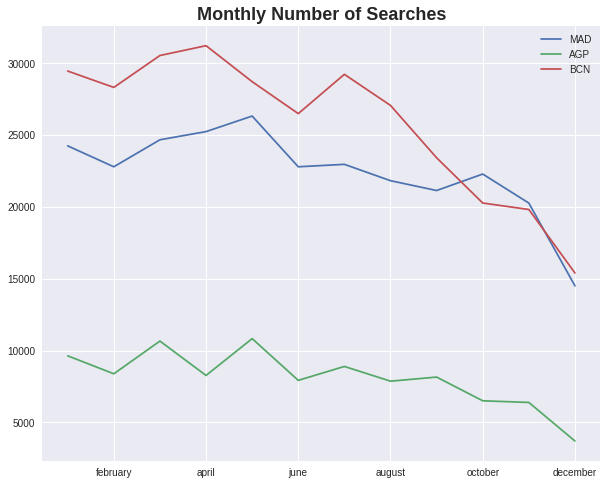

In [26]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(10,8))

madrid_searches['Date'].dt.month.value_counts().sort_index().plot(label='MAD')
malaga_searches['Date'].dt.month.value_counts().sort_index().plot(label='AGP')
barcelona_searches['Date'].dt.month.value_counts().sort_index().plot(label='BCN')

ax.set_title('Monthly Number of Searches', 
             fontsize=18, 
             fontweight ='bold')

ax.set_xticks([2, 4, 6, 8, 10, 12])
months = ['february', 'april', 'june', 
          'august', 'october', 'december']
ax.set_xticklabels(months)

ax.legend();